In [1]:
import os
from importlib.resources import files

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from learn_embedding.utils.data_process import DataProcess

In [2]:
colors = ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
          "#a65628", "#984ea3", "#999999", "#e41a1c", "#dede00", ]

## Load Dataset

In [3]:
dataset = "Angle"
data_path = files('learn_embedding').joinpath(os.path.join('data', '{}.mat'.format("Angle")))
data = sio.loadmat(data_path)

## Extract Demonstrations
Demonstrations structure tensor[i,j,k] with i the sample number, j the dimension and k the trajectory (this assumes that all the trajectories have the same number of points).

In [4]:
dt = data["dt"]

num_dimensions = 2
num_trajectories = len(data['demos'][0])
num_samples = data['demos'][0][0]['t'][0, 0].shape[1]

time = np.zeros((num_samples, 1, num_trajectories))
pos = np.zeros((num_samples, num_dimensions, num_trajectories))
vel = np.zeros_like(pos)
acc = np.zeros_like(pos)

for i, demo in enumerate(data['demos'][0]):
    time[:,:,i] = demo['t'][0,0].T
    pos[:,:,i] = demo['pos'][0,0].T
    vel[:,:,i] = demo['vel'][0,0].T
    acc[:,:,i] = demo['acc'][0,0].T

## Raw Demonstrations

(-915.4959892109334, 486.8752600549906, -367.0008133873271, 357.9185767032287)

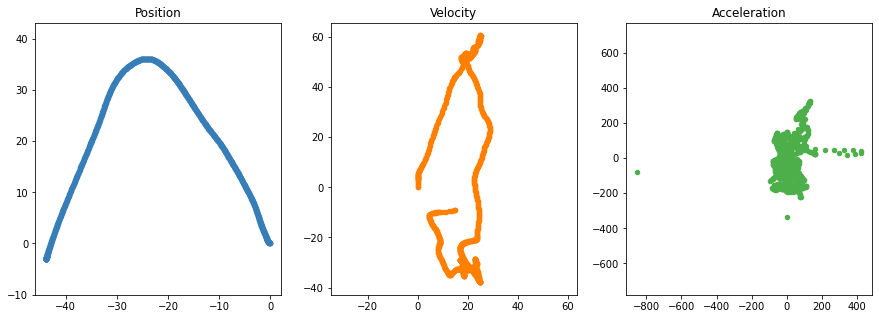

In [5]:
fig = plt.figure(figsize=(15, 5))
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
ax[0].set_title('Position')
ax[1].set_title('Velocity')
ax[2].set_title('Acceleration')
for i in range(1):
    ax[0].scatter(pos[:,0,i], pos[:,1,i], s=20, c=colors[0])
    ax[1].scatter(vel[:,0,i], vel[:,1,i], s=20, c=colors[1])
    ax[2].scatter(acc[:,0,i], acc[:,1,i], s=20, c=colors[2])    
ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')

## Rescale

(-0.55, 0.55, -0.55, 0.55)

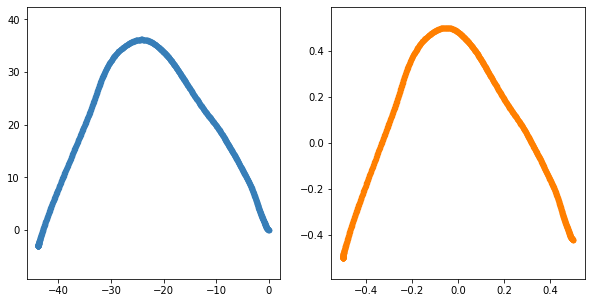

In [6]:
p1 = DataProcess.rescale(pos[:,:,0], np.array([0.5,0.5]), np.array([-0.5,-0.5]))

fig = plt.figure(figsize=(10, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p1[:,0], p1[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')

## Rotate

(-48.14099762123963, 47.51267418396393, -48.5883731899915, 45.10053423377896)

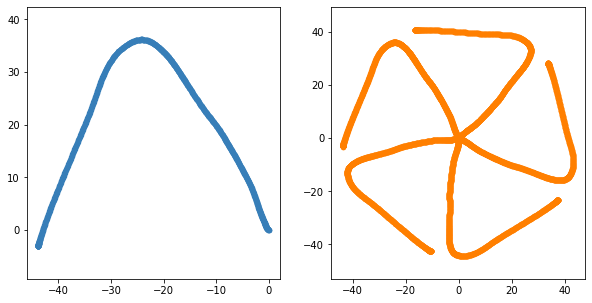

In [7]:
p2 = DataProcess.rotate(pos[:,:,0], 5)

fig = plt.figure(figsize=(10, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
for i in range(5):
    ax[1].scatter(p2[:,0,i], p2[:,1,i], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')

## Normalize

(-1.700041157609638,
 1.6150721314482308,
 -1.7502185374827892,
 1.5940756512839827)

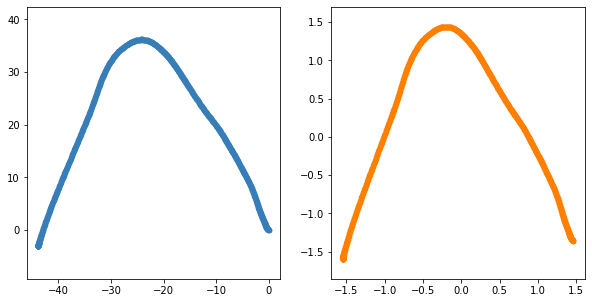

In [8]:
p3 = DataProcess.normalize(pos[:,:,0])

fig = plt.figure(figsize=(10, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p3[:,0], p3[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')

## Derive Velocities & Accelerations

(-6438.161334788804, 749.8593241301273, -533.3719418070802, 3851.7122735180424)

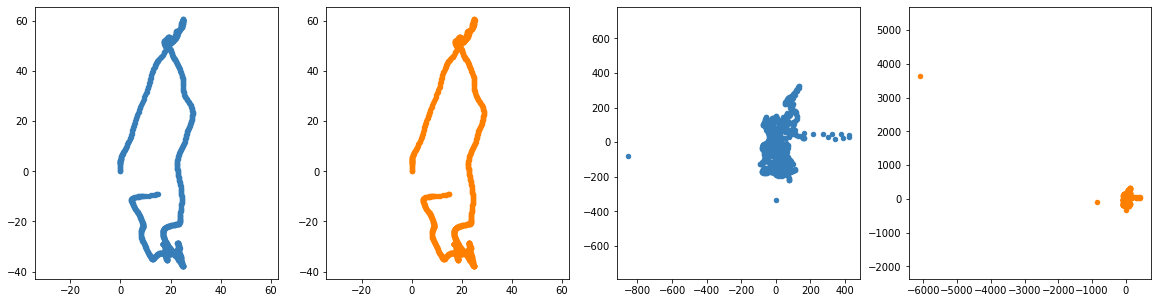

In [9]:
v = DataProcess.derive(pos[:,:,0], time[:,:,0])
a = DataProcess.derive(v, time[:,:,0])

fig = plt.figure(figsize=(20, 5))
ax = [fig.add_subplot(141), fig.add_subplot(142), fig.add_subplot(143), fig.add_subplot(144)]
ax[0].scatter(vel[:,0,0], vel[:,1,0], s=20, c=colors[0])
ax[1].scatter(v[:,0], v[:,1], s=20, c=colors[1])
ax[2].scatter(acc[:,0,0], acc[:,1,0], s=20, c=colors[0])
ax[3].scatter(a[:,0], a[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')
ax[3].axis('equal')

## Trim

(-45.96675483489296, 1.853575670683857, -5.019322877697769, 38.141668706073695)

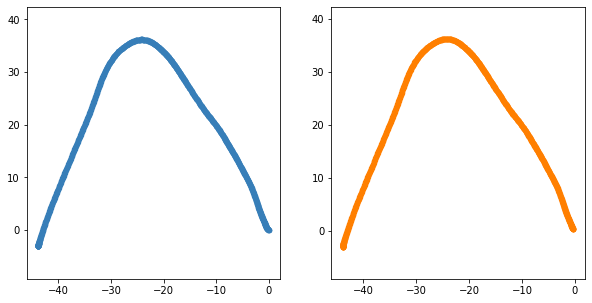

In [10]:
p4 = DataProcess.trim(pos[:,:,0], 10, 10)

fig = plt.figure(figsize=(10, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(pos[:,0,0], pos[:,1,0], s=20, c=colors[0])
ax[1].scatter(p4[:,0], p4[:,1], s=20, c=colors[1])
ax[0].axis('equal')
ax[1].axis('equal')

## Test preprocess

### Original Trajecotry

In [11]:
t = time[:,:,0]
x = pos[:,:,0]
v = vel[:,:,0]
a = acc[:,:,0]

### Trim

In [12]:
t = DataProcess.trim(t, 10, 10)
x = DataProcess.trim(x, 10, 10)
v = DataProcess.trim(v, 10, 10)
a = DataProcess.trim(a, 10, 10)

### Rescale/Normalize and Derive

In [13]:
# x = DataProcess.rescale(x, np.array([1,1]), np.array([0,0]))
# v = DataProcess.derive(x, t)
# a = DataProcess.derive(v, t)

### Smooth

In [14]:
x = DataProcess.smooth(x, 10, 2, deriv=0, delta=dt, mode='interp', cval=0.0)
v = DataProcess.smooth(x, 10, 2, deriv=1, delta=dt, mode='interp', cval=0.0)
a = DataProcess.smooth(x, 10, 2, deriv=2, delta=dt, mode='interp', cval=0.0)

(-61.85840755041026,
 104.31956069100004,
 -160.99685589393667,
 231.29732028298932)

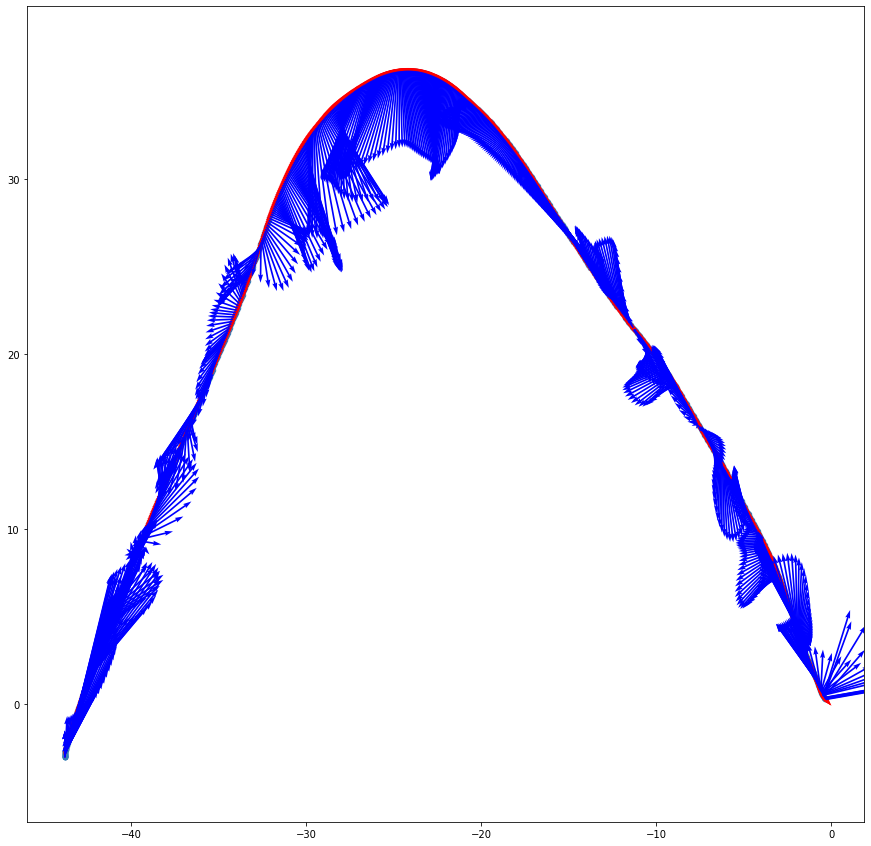

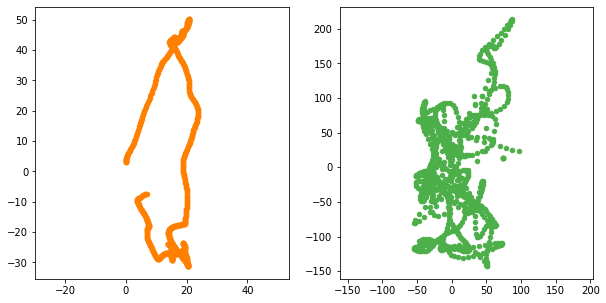

In [16]:
step = 1
scale = 1000
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.scatter(x[::step,0], x[::step,1], s=20, c=colors[0])
ax.quiver(x[::step,0], x[::step,1], v[::step,0]/scale, v[::step,1]/scale, scale=1, width=0.002, color='r')
ax.quiver(x[::step,0], x[::step,1], a[::step,0]/scale, a[::step,1]/scale, scale=1, width=0.002, color='b')
ax.axis('equal')

fig = plt.figure(figsize=(10, 5))
ax = [fig.add_subplot(121), fig.add_subplot(122)]
ax[0].scatter(v[:,0], v[:,1], s=20, c=colors[1])
ax[1].scatter(a[:,0], a[:,1], s=20, c=colors[2])
ax[0].axis('equal')
ax[1].axis('equal')